In [1]:
# We want pandas and our scaler:

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
# Preset pandas as Df for scaler

from sklearn import set_config
set_config(transform_output="pandas")

In [3]:
# Install scikit newest version

# pip install scikit-learn --upgrade

In [4]:
# Load Csv:

df_5k_songs = pd.read_csv(r'df_audio_features_5000.csv')

In [5]:
#  Strip whitespaces & clean columns

df_5k_songs.columns = df_5k_songs.columns.str.strip()
df_5k_songs_cl = df_5k_songs.drop(['id','html','type', 'time_signature'], axis=1)

df_5k_songs.columns

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [6]:
# Create title, drop name, artist column

df_5k_songs_cl['title'] = df_5k_songs_cl['artist'] + ' - ' + df_5k_songs_cl['name']
df_5k_songs_cl = df_5k_songs_cl.drop(['name', 'artist'], axis=1)
df_5k_songs_cl.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,title
0,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,Gilberto Gil ...
1,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,Antônio Carlos Jobim ...
2,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,Martinho Da Vila ...
3,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,Chico César ...
4,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,Kurt Elling ...


In [7]:
# Slice only energy & tempo and set title

df_5k_songs_energy_tempo = df_5k_songs_cl[['title','energy','tempo']].copy()

# Sort by title

df_5k_songs_energy_tempo.sort_values(by='title', ascending=True, inplace=True)

# Set title as index

df_5k_songs_energy_tempo.set_index('title', inplace=True)

In [8]:
df_5k_songs_energy_tempo. head()

,energy,tempo
title,,
*NSYNC - Bye Bye Bye,0.870,172.716
-M- - Solidarité,0.777,82.414
2CELLOS - Candle in the Wind,0.104,112.161
2CELLOS - Hurt,0.208,77.305
2CELLOS - I Don't Care,0.315,102.033


## Scaling with standartscaler

In [9]:
# StScaler - Create Df
st_scaler = StandardScaler()

# Transformation here
df_5k_songs_energy_tempo_scaled = st_scaler.fit_transform(df_5k_songs_energy_tempo)

df_5k_songs_energy_tempo.sample(10)

,energy,tempo
title,,
"Major Lazer - Watch out for This (Bumaye) [feat. Busy Signal, the Flexican & Fs Green]",0.754,107.999
Martin Garrix - Scared to Be Lonely,0.540,137.972
DJ Bull Blood - Guatauba - Remastered,0.770,91.977
Sinister - Cross The Styx,0.947,103.975
Manel - Mort d'un heroi romàntic,0.535,114.871
Baphomet - Valley Of The Dead,0.856,146.630
Saule - Dusty Men,0.271,139.988
Disincarnate - In Sufferance,0.948,86.785
Crystal Fighters - Plage,0.716,80.865


In [10]:
# Display age column of original DataFrame and age column of MinMaStandard scaledxed DataFrame to compare
pd.DataFrame({
    'original': df_5k_songs_energy_tempo.iloc[:,-1], 
    'standard_scale': df_5k_songs_energy_tempo_scaled.iloc[:,-1]
}).sort_values(by='original')

,original,standard_scale
title,,
Taylor Swift - Shake It Off,0.000,-4.156077
"Johann Sebastian Bach - French Suite No. 5 in G Major, BWV 816: I. Allemande",34.856,-2.935874
Morpheus Descends - Immortal Coil,42.817,-2.657184
Hauschka - Sunset Monet,49.654,-2.417841
Oscar Peterson Trio - I Got It Bad And That Ain't Good,49.689,-2.416616
...,...,...
Little Richard - Ready Teddy,205.973,3.054414
Otis Redding - (Sittin' On) the Dock of the Bay,205.981,3.054695
Duane Eddy - Rebel Rouser,206.313,3.066317


In [11]:
# 

pd.DataFrame({
    'original': df_5k_songs_energy_tempo.iloc[:,-2], 
    'standard_scale': df_5k_songs_energy_tempo_scaled.iloc[:,-2]
}).sort_values(by='original')

,original,standard_scale
title,,
Taylor Swift - Shake It Off,0.000000,-2.266902
Keith Fullerton Whitman - Track3a (2waynice),0.000020,-2.266832
"Ennio Morricone - Deborah's Theme (From ""Once upon a Time in America"")",0.000436,-2.265390
"George Frideric Handel - Handel Sarabande Variation (Arr. for Piano from Sarabande, HWV 437)",0.000791,-2.264159
"Arnold Schoenberg - Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.000930,-2.263676
...,...,...
Post Mortem - Armies Of The Dead,0.999000,1.198149
Mickie Krause - Supa Deutschland - Medley,0.999000,1.198149
Tim Toupet - Ich bin ein Döner - Single Version,0.999000,1.198149


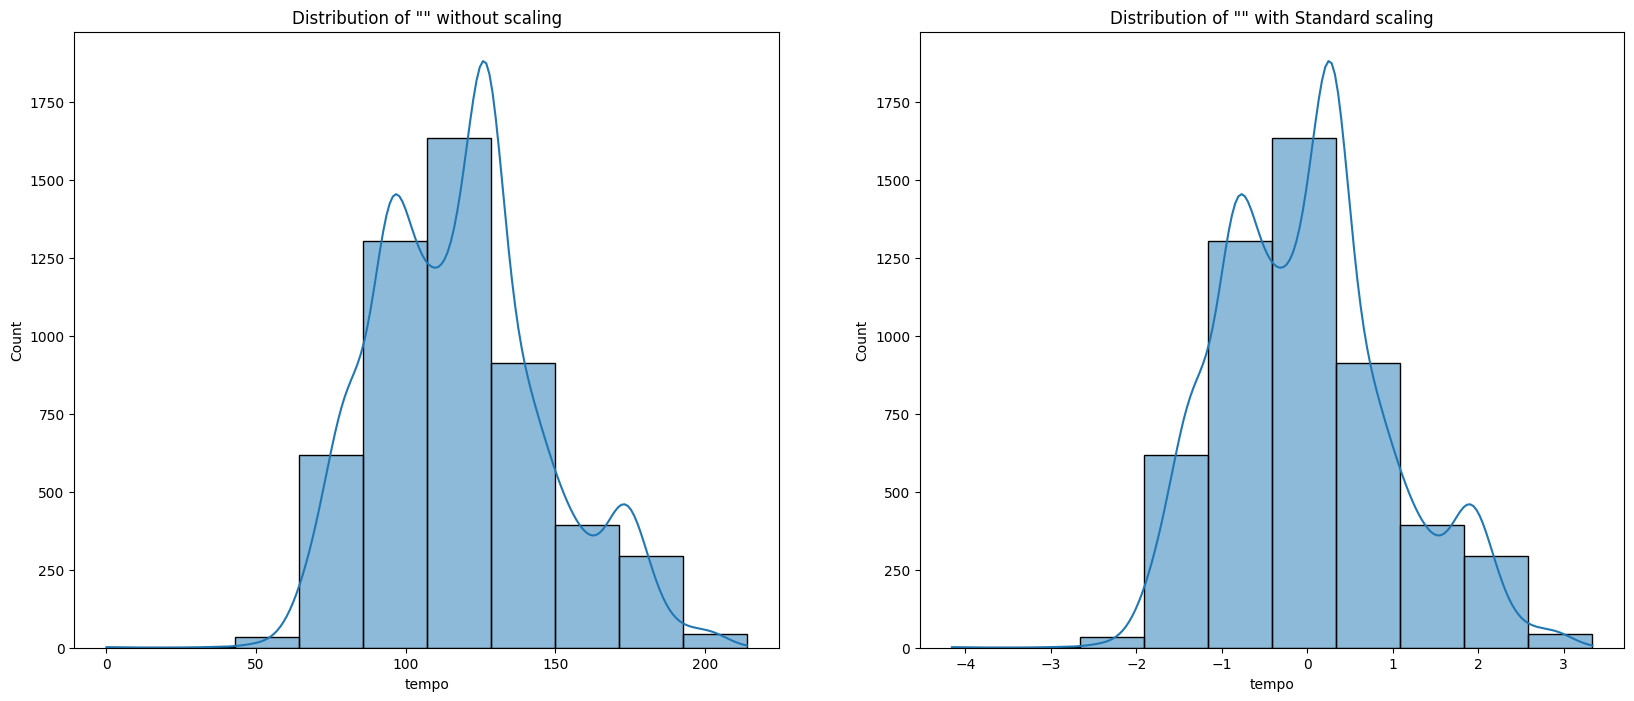

In [12]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=df_5k_songs_energy_tempo.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(df_5k_songs_energy_tempo_scaled.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution of "" without scaling')
ax2.set_title('Distribution of "" with Standard scaling')

plt.show()

In [13]:
# # Making the DataFrame for the Standard heatmap
# df_5k_songs_energy_tempo_standard_distances = pd.DataFrame(pairwise_distances(df_5k_songs_energy_tempo_scaled), index=df_5k_songs_energy_tempo.index, columns=df_5k_songs_energy_tempo.index)

# # Stating that we want two plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# # Plotting the two plots
# sns.heatmap(df_5k_songs_energy_tempo, ax=ax1, linewidths=.2);
# sns.heatmap(df_5k_songs_energy_tempo_standard_distances, ax=ax2, linewidths=.2);

# # Adding titles to the plots
# ax1.set_title('Everything NOT in the same 1-10 scaling')
# ax2.set_title('Everything Standard scaled')

# plt.show()

## KMeans

In [14]:
# Applying Kmeans, chose quantity of cluster

df_5k_songs_energy_tempo_cluster_model = KMeans(n_clusters=6)

# Feed data & transform(?)

df_5k_songs_energy_tempo_cluster_model.fit(df_5k_songs_energy_tempo_scaled)
df_5k_songs_energy_tempo_cluster_model

c:\Users\AlexD\Desktop\Python\Python 3.10.6\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

my_model = df_5k_songs_energy_tempo_cluster_model

In [15]:
# Clustercenterposition

df_5k_songs_energy_tempo_cluster_model.cluster_centers_

array([[ 0.78603158,  0.29845489],
       [-1.60965266, -1.18571603],
       [-1.58297859,  0.85481691],
       [-0.34021086,  0.09243274],
       [ 0.53685497, -0.85870161],
       [ 0.54498565,  1.749968  ]])

In [16]:
# Create DataFrame of Standard scaled values

df_5k_songs_energy_tempo_cluster_position = pd.DataFrame(df_5k_songs_energy_tempo_cluster_model.cluster_centers_)
# Rename cause of length
df_5k_song_e_t_cl_pos = df_5k_songs_energy_tempo_cluster_position

df_5k_song_e_t_cl_pos.columns = ['energy','tempo']
df_5k_song_e_t_cl_pos

,energy,tempo
0,0.786032,0.298455
1,-1.609653,-1.185716
2,-1.582979,0.854817
3,-0.340211,0.092433
4,0.536855,-0.858702
5,0.544986,1.749968


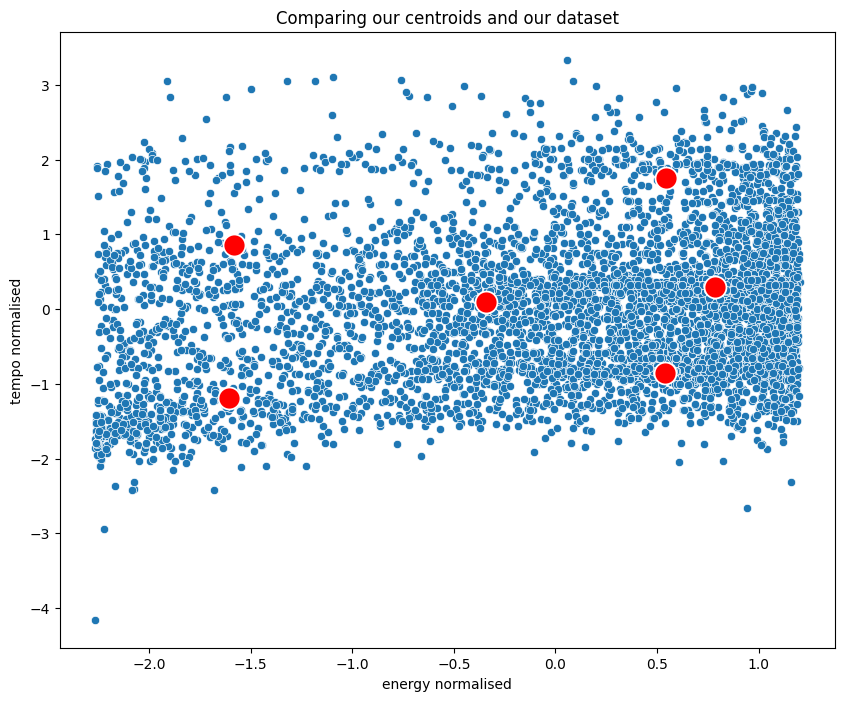

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(df_5k_songs_energy_tempo_scaled)
plot_data.columns = ['energy','tempo']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('energy normalised')
plt.ylabel('tempo normalised')
sns.scatterplot(data=plot_data, x='energy', y='tempo')
sns.scatterplot(data=df_5k_song_e_t_cl_pos, x='energy', y='tempo', color='red', s=250)
plt.show()

In [18]:
df_5k_songs_energy_tempo_cluster_model.labels_

array([5, 4, 1, ..., 3, 4, 4])

In [19]:
df_5k_songs_energy_tempo['cluster'] = df_5k_songs_energy_tempo_cluster_model.labels_
df_5k_songs_energy_tempo.sample(5)

,energy,tempo,cluster
title,,,
Luisa Sobral - Sr. Vinho,0.3370,192.711,2
Cryptopsy - Two-Pound Torch,0.9830,110.841,0
Voyager - Aquarela Do Brasil,0.1450,91.330,1
"Philip Glass - I'm Going to Make a Cake (from ""The Hours"" Soundtrack)",0.0358,81.364,1
De La Ghetto - Mi Fanatica,0.6910,92.993,4
